In [9]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
pred = "Predictions/MK_6_model_predictions/17_10_2022/newDice_Test_1_PTE/step_1/Brats18_TCIA09_254_1.nii.gz"
img_pred = nib.load(pred)
pred_data = img_pred.get_fdata()

truth = "Brats_2018_data/Brats_2018_data/LGG/Brats18_TCIA09_254_1/Brats18_TCIA09_254_1_whseg_norm.nii.gz"
img_truth = nib.load(truth)
truth_data = img_truth.get_fdata()

x = pred_data[:,:,:]
y = truth_data[:,:,:]

print(y.shape)

# print(np.sum(x))
# print(np.sum(y))

# plt.title("Prediction")
# plt.imshow(x)
# plt.show()
# plt.title("Truth")
# plt.imshow(y)
# plt.show()

def dice_score(prediction, truth):

    pred_1 = np.clip(prediction, 0, 1.0)
    truth_1 = np.clip(truth, 0, 1.0)

    # binarize
    pred_1 = np.where(pred_1 > 0.5, 1, 0)
    truth_1 = np.where(truth_1 > 0.5, 1, 0)

    # Dice calculation
    product = np.dot(truth_1.flatten(), pred_1.flatten())
    dice_num = 2 * product + 1
    pred_sum = pred_1.sum()
    label_sum = truth_1.sum()
    dice_den = pred_sum + label_sum + 1
    score = dice_num / dice_den
    
    if pred_1.sum() == 0 and truth_1.sum() > 2:
        score = 0
        
    return score

def calculate_dice(pred_seg, gt_lbl):
    union_correct = pred_seg * gt_lbl
    tp_num = np.sum(union_correct)
    gt_pos_num = np.sum(gt_lbl)
    dice = (2.0 * tp_num) / (np.sum(pred_seg) + gt_pos_num) if gt_pos_num != 0 else -1
    return dice
  
print(dice_score(x,y))
print(calculate_dice(x,y))



(240, 240, 155)
0.93986783905639
0.939867678443125


In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
pred = "Predictions/MK_6_model_predictions/17_10_2022/newDice_Test_1_PTE/step_1/Brats18_TCIA09_254_1.nii.gz"
img_pred = nib.load(pred)
pred_data = img_pred.get_fdata()

truth = "Brats_2018_data/Brats_2018_data/LGG/Brats18_TCIA09_254_1/Brats18_TCIA09_254_1_whseg_norm.nii.gz"
img_truth = nib.load(truth)
truth_data = img_truth.get_fdata()




(240, 240, 155)


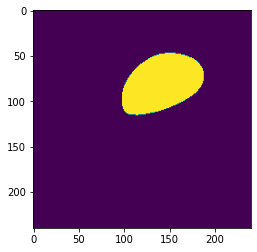

(240, 240, 155)


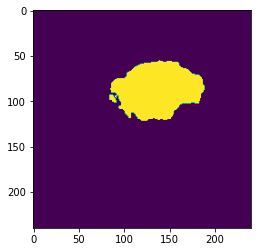

In [19]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
pred = "Predictions/MK_6_model_predictions/25_10_2022/newDice_Test_PTE_2/step_0_50/Brats18_TCIA09_254_1.nii.gz"
img_pred = nib.load(pred)
pred_data = img_pred.get_fdata()

print(pred_data.shape)
plt.imshow(pred_data[:,:,70])
plt.show()

truth = "Brats_2018_data/Brats_2018_data/LGG/Brats18_TCIA09_254_1/Brats18_TCIA09_254_1_whseg_norm.nii.gz"
img_truth = nib.load(truth)
truth_data = img_truth.get_fdata()

print(truth_data.shape)
plt.imshow(truth_data[:,:,70])
plt.show()